In [8]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as sps
import math

sns.set(style="darkgrid", font_scale=1.4)

In [9]:
import subprocess

subprocess.call(["cmake", "CMakeLists.txt"])
subprocess.call(["make"])

0

In [10]:
def test(num_vertexes, num_cycles, num_good_edges):
    return float(subprocess.check_output(["./helloworld",
                                    "{}".format(num_vertexes),
                                    "{}".format(num_cycles),
                                    "{}".format(num_good_edges)],
                                   universal_newlines=True))

In [4]:
def dependency_on_num_vertexes():
    num_vertexes = np.array([10, 20, 25, 30, 40, 50, 80, 100])
    min_accuracy = []
    mean_accuracy = []
    
    for num in num_vertexes:
        max_num_cycles = num // 4
        base = 2
        stop = int(math.log(max_num_cycles, base))
        num_cycles_arr = 2 ** np.arange(stop + 1)
        
        max_num_good_edges = num
        stop = int(math.log(max_num_good_edges, base))
        num_good_edges_arr = 2 ** np.arange(stop + 1)
        num_good_edges_arr = np.append(num_good_edges_arr, [num])
        
        accuracy = []
        
        for num_cycles in num_cycles_arr:
            for num_good_edges in num_good_edges_arr:
                res = test(num, num_cycles, num_good_edges)
                accuracy.append(res)
        
        accuracy = np.array(accuracy)
        mean_accuracy.append(np.mean(accuracy))
        min_accuracy.append(np.max(accuracy))
        
    plt.figure(figsize=(12, 7))
    
    plt.plot(num_vertexes, mean_accuracy, color = 'firebrick', label = 'средняя точность')
    plt.plot(num_vertexes, min_accuracy, color = 'red', label = 'худшая точность')
    
    plt.hlines(7./6., np.min(num_vertexes), np.max(num_vertexes), color = 'orange', label = '7/6')
    
    plt.title("Зависимость точности приближения от количества вершин")
    
    plt.xlabel("Количество вершин")
    plt.ylabel("Точность приближения")
    plt.legend(loc='best')
    plt.show()
        
        

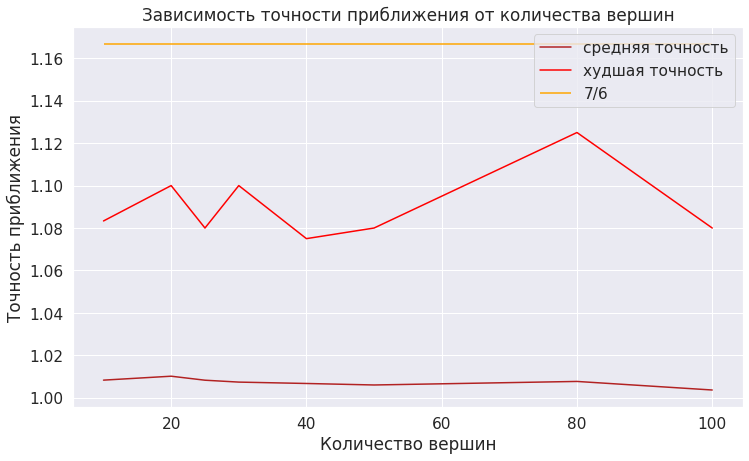

In [5]:
dependency_on_num_vertexes()

In [18]:
def dependency_on_light_edges(num_vertexes):
    min_accuracy = []
    mean_accuracy = []
    
    max_num_cycles = num_vertexes // 4
    base = 2
    stop = int(math.log(max_num_cycles, base))
    num_cycles_arr = 2 ** np.arange(stop + 1)
        
    num_good_edges_arr = np.linspace(50, num_vertexes, 50)
    for num_good_edges in num_good_edges_arr: 
        accuracy = []
        for num_cycles in num_cycles_arr:
            res = test(num_vertexes, num_cycles, num_good_edges)
            accuracy.append(res)
        
        accuracy = np.array(accuracy)
        mean_accuracy.append(np.mean(accuracy))
        min_accuracy.append(np.max(accuracy))
        
    plt.figure(figsize=(12, 7))
    
    plt.title("Зависимость точности приближения от количества рёбер веса 1 в решении")
    
    plt.plot(num_good_edges_arr, mean_accuracy, color = 'firebrick', label = 'средняя точность')
    plt.plot(num_good_edges_arr, min_accuracy, color = 'red', label = 'худшая точность')
    
    plt.hlines(7./6., np.min(num_good_edges_arr), np.max(num_good_edges_arr), color = 'orange', label = '7/6')
    
    plt.xlabel("Количество рёбер веса 1")
    plt.ylabel("Точность приближения")
    plt.legend()
    plt.show()

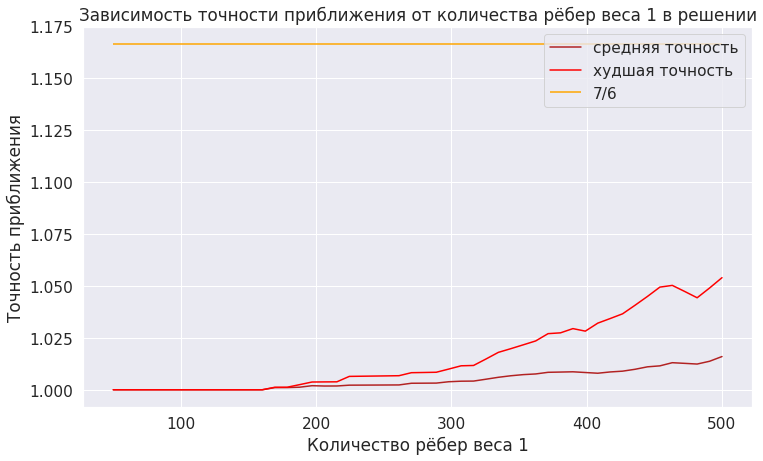

In [19]:
dependency_on_light_edges(500)

In [15]:
def dependency_on_num_cycles():
    num_vertexes = 500
    num_cycles_arr = [1, 2, 4, 5, 10, 20, 30, 40, 60, 90]
     
    num_good_edges = num_vertexes
    
    accuracy = []
    for num_cycles in num_cycles_arr:
        res = test(num_vertexes, num_cycles, num_good_edges)
        accuracy.append(res)
        
    accuracy = np.array(accuracy)
        
    plt.figure(figsize=(12, 7))
    
    plt.title("Зависимость точности приближения от количества циклов")
    
    plt.plot(num_cycles_arr, accuracy, color = 'red', label = 'точность')
    plt.hlines(7./6., np.min(num_cycles_arr), np.max(num_cycles_arr), color = 'orange', label = '7/6')
    
    plt.xlabel("Количество циклов")
    plt.ylabel("Точность приближения")
    plt.legend()
    plt.show()

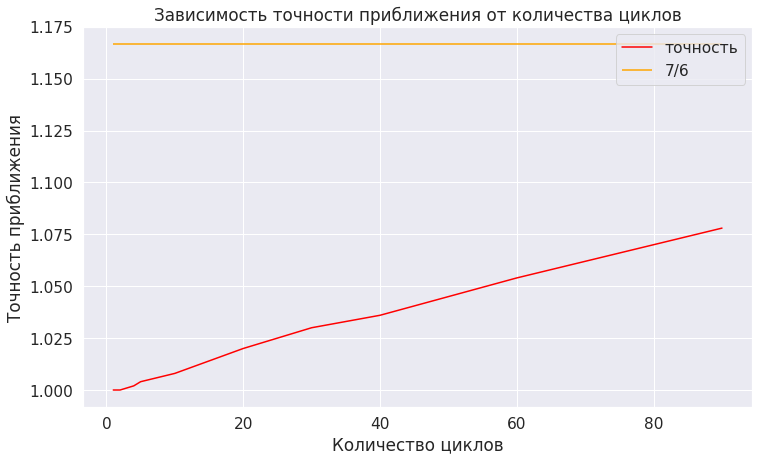

In [16]:
dependency_on_num_cycles()

In [17]:
def dependency_on_num_vertexes_lim():
    num_vertexes = np.array([10, 20, 25, 30, 40, 50, 80, 100])
    accuracy = []
    
    for num in num_vertexes:
        max_num_cycles = num // 4
        max_num_good_edges = num
        
        res = test(num, max_num_cycles, max_num_good_edges)
        accuracy.append(res)
        
    plt.figure(figsize=(12, 7))
    
    plt.plot(num_vertexes, accuracy, color = 'firebrick', label = 'точность')
    
    plt.hlines(7./6., np.min(num_vertexes), np.max(num_vertexes), color = 'orange', label = '7/6')
    
    plt.title("Зависимость точности приближения от количества вершин в краевом случае")
    
    plt.xlabel("Количество вершин")
    plt.ylabel("Точность приближения")
    plt.legend(loc='best')
    plt.show()

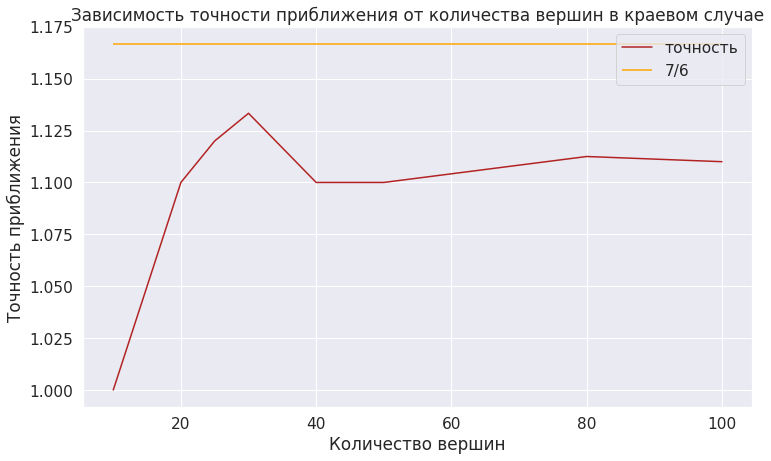

In [12]:
dependency_on_num_vertexes_lim()